# Import Libraries and Necessary Installation

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import random
from nose.tools import *
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,recall_score,accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error, make_scorer
import time
import xgboost as xgb
plt.style.use(style="seaborn")
%matplotlib inline

# Read File

In [2]:
import os
os.getcwd()
os.chdir('/Users/13158')

In [3]:
#Load the bike sharing dataset file named “london_merged.csv”.

df = pd.read_csv("london_merged.csv")

In [4]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


#Check Memory Usage

In [5]:
#Checked memory usage using the info method in Pandas.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB
None


# Exploratory Data Analysis

#Show Shape of Dataset

In [6]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (17414, 10)


#Feature Size

In [7]:
Feature_Size = len(df.columns)
print("Feature_Size for Data =", Feature_Size)

Feature_Size for Data = 10


#Show Statistics for Dataset

In [8]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


Convert timestamp column to actual timestamp datatype

In [9]:
#Convert the timestamp column to actual timestamp datatype because as per the requirement the dataset needs to be sorted 
#based on time slots from old to new before splitting into test and train. 

df['timestamp'] = pd.to_datetime(df['timestamp'], format ="%Y-%m-%d %H:%M:%S")

#Show data types

In [10]:
display(df.dtypes.value_counts())

float64           8
datetime64[ns]    1
int64             1
dtype: int64

#Show Numerical and Categorical Variables

In [11]:
#Check if there are any categorical variables in the dataset so that we can process them accordingly during Feature Engineering.

numerical_var = df.columns[df.dtypes != 'object']
categorical_var = df.columns[df.dtypes == object]

print(numerical_var)
print(categorical_var)

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')
Index([], dtype='object')


#Check for Duplicates

In [12]:
#No Duplicates found

df.duplicated().sum()

0

#Check Null values

In [13]:
#No Null values found

df.isnull().values.any()

False

#Correlation

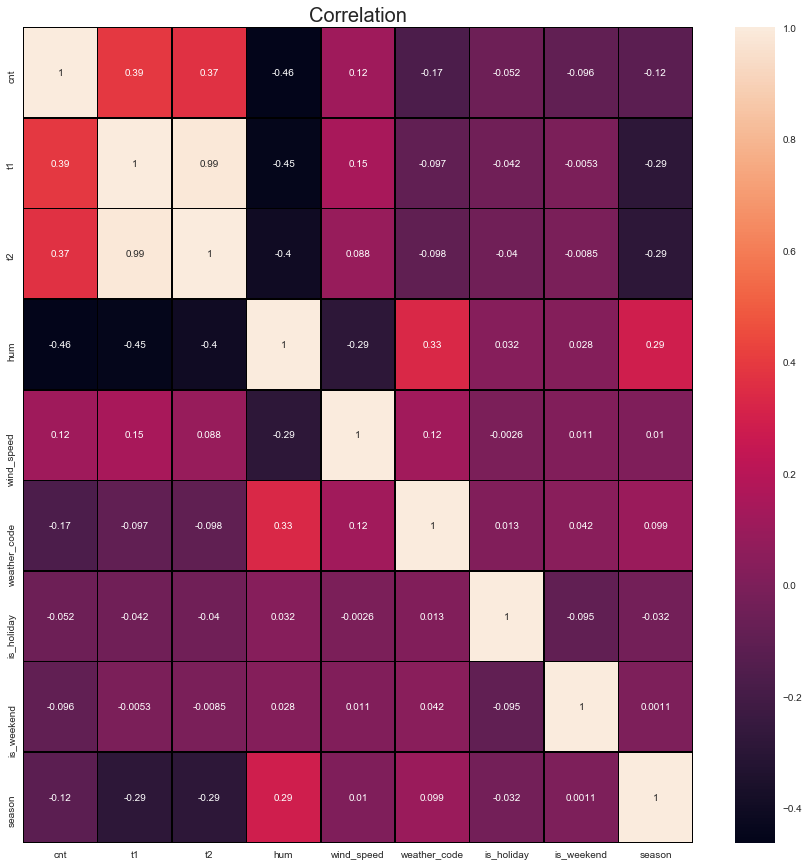

In [14]:
#Find correlation between the attributes using Correlation Matrix. Real temperature in C (“t1”) and Feels like temperature 
#in C (“t2”) are highly positively correlated. The count of new bike shares (“Cnt”) and Humidity in percentage (“hum”) are 
#negatively correlated. Real temperature in C (“t1”) and Humidity in percentage (“hum”) are negatively correlated. 
#Feels like temperature in C (“t2”) and Humidity in percentage (“hum”) are negatively correlated.

plt.figure(figsize=(15,15))
plt.title("Correlation", fontsize=20)
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, Linewidth=0.5, annot=True, linecolor='black')

# Feature Engineering

In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format ="%Y-%m-%d %H:%M:%S")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [17]:
#Sort the dataset based on timestamp in ascending order

df.sort_values(by=['timestamp'], inplace=True, ascending = True)

In [18]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [19]:
#Apply assert_true (a unit test library function in Python used in unit testing to compare test value with true) 
#to check and confirm whether the columns “timestamp”, “isholiday” and “isweekend” are present

In [20]:
def add_non_workday(df):
    """
    The function is grouping "is_holiday" and "is_weekend" columns into a new one "is_non_workday"
    Input: pandas DataFrame that contains columns 'is_holiday','is_weekend'
    """
    assert_true('is_holiday' in set(df.columns))
    assert_true('is_weekend' in set(df.columns))
    
    df['is_non_workday'] = df['is_holiday'] + df['is_weekend']
    df = df.drop(['is_holiday','is_weekend'],axis=1)
    
    assert_true('is_non_workday' in set(df.columns))
    
    return df

In [21]:
def add_month(df):
    """
    The function is extracting the month of a timestamp into a new column.
    Input: pandas DataFrame that contains 'timestamp' column
    """
    assert_true('timestamp' in set(df.columns))
    
    df['month'] = df['timestamp'].dt.month
    
    assert_true('month' in set(df.columns))
    return df

In [22]:
def add_year(df):
    """
    The function is extracting the year of a timestamp into a new column.
    Input: pandas DataFrame that contains 'timestamp' column
    """
    assert_true('timestamp' in set(df.columns))
    
    df['year'] = df['timestamp'].dt.year
    
    assert_true('year' in set(df.columns))
    return df

In [23]:
def add_hour(df):
    """
    The function is extracting the hour of a timestamp into a new column.
    Input: pandas DataFrame that contains 'timestamp' column
    """
    assert_true('timestamp' in set(df.columns))
    
    df['hour'] = df['timestamp'].dt.hour
    
    assert_true('hour' in set(df.columns))
    return df

In [24]:
def add_encode(df, column, max_value):
    """
    The function is encoding time series cyclical features with sin and cos.
    Input: 
    ---------
    df - pandas DataFrame
    column - column name
    max_value - column max value
    Output: 
    -----------
    -same dataframe with _sin and _cos columns added
    """
    assert_true(column in set(df.columns))
    
    df[column + '_sin'] = np.sin(2 * np.pi * df[column] / max_value)
    df[column + '_cos'] = np.cos(2 * np.pi * df[column] / max_value)
    
    assert_true((column + '_sin') in set(df.columns))
    assert_true((column + '_cos') in set(df.columns))
    return df

In [25]:
def add_night_hours(df):
    """
    The function is creating a new column "is_night". It requires a column with hours.
    If the hour is from 8:00 to 20:00 the data is classified as 0, if not in this interval it's 1.
    The purpose is try to to catch the sunlight status, but it's not taking in acount the time of the year and summertime.
    
    Input:
    df- pandas DataFrame, containing 'hour' column
    Output :
    Pandas DataFrame with added "is_night column"
    """
    assert_true('hour' in set(df.columns))
    
    df['is_night'] = 0
    df.loc[(df['hour'] < 8) | (df['hour'] > 20), 'is_night'] = 1
    
    assert_true('is_night' in set(df.columns))
    return df

In [26]:
print(df.info())


#Create a derived column based on “is_holiday” and “is_weekend” to find out a working-day/non-working day pattern with 
#respect to the bike sharing counts. Also, the timestamp column has been disintegrated to month, year, hour, and night_hour 
#to learn about more hidden patterns (if any) in the dataset. This will enable the machine learning algorithms to easily 
#learn the underlying patterns till the lowest level of granularity in the timestamp column

df1=df
df1=add_non_workday(df1)
df1=add_month(df1)
df1=add_year(df1)
df1=add_hour(df1)
#df1=add_encode(df1,'hour',23)
df1=add_night_hours(df1)

print(df1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.5 MB
None
                timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1     2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0 

In [27]:
df1

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,season,is_non_workday,month,year,hour,is_night
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,3.0,1.0,1,2015,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,3.0,1.0,1,2015,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,3.0,1.0,1,2015,2,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,3.0,1.0,1,2015,3,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,3.0,1.0,1,2015,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,3.0,0.0,1,2017,19,0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,3.0,0.0,1,2017,20,0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,3.0,0.0,1,2017,21,1
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,3.0,0.0,1,2017,22,1


# Splitting dataset into train and test dataset

In [28]:
#Split the dataset (df1) into train and test, i.e 80% of the dataset is used for training the model and 20% of the dataset 
#is used for testing the model. Then, separated the output (Y) variable (‘cnt’) from input (X) variable for both train 
#and test datasets.

In [29]:
X_train, X_test= np.split(df1, [int(.8 *len(df))])

In [30]:
X_train

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,season,is_non_workday,month,year,hour,is_night
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,3.0,1.0,1,2015,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,3.0,1.0,1,2015,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,3.0,1.0,1,2015,2,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,3.0,1.0,1,2015,3,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,3.0,1.0,1,2015,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13926,2016-08-09 22:00:00,860,16.0,16.0,55.0,19.0,1.0,1.0,0.0,8,2016,22,1
13927,2016-08-09 23:00:00,497,15.0,15.0,59.0,16.0,1.0,1.0,0.0,8,2016,23,1
13928,2016-08-10 00:00:00,302,14.5,14.5,63.0,17.0,1.0,1.0,0.0,8,2016,0,1
13929,2016-08-10 01:00:00,132,14.0,14.0,67.0,14.0,1.0,1.0,0.0,8,2016,1,1


In [31]:
X_test

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,season,is_non_workday,month,year,hour,is_night
13931,2016-08-10 03:00:00,34,13.0,13.0,77.0,16.0,1.0,1.0,0.0,8,2016,3,1
13932,2016-08-10 04:00:00,51,13.0,13.0,77.0,14.0,1.0,1.0,0.0,8,2016,4,1
13933,2016-08-10 05:00:00,144,12.5,12.5,79.5,13.0,1.0,1.0,0.0,8,2016,5,1
13934,2016-08-10 06:00:00,839,13.0,13.0,79.5,15.0,1.0,1.0,0.0,8,2016,6,1
13935,2016-08-10 07:00:00,2362,13.5,13.5,74.5,16.0,2.0,1.0,0.0,8,2016,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,3.0,0.0,1,2017,19,0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,3.0,0.0,1,2017,20,0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,3.0,0.0,1,2017,21,1
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,3.0,0.0,1,2017,22,1


#Set target variable for Dataset

In [32]:
Y_train = X_train.loc[:,'cnt']
Y_train

0        182
1        138
2        134
3         72
4         47
        ... 
13926    860
13927    497
13928    302
13929    132
13930     57
Name: cnt, Length: 13931, dtype: int64

In [33]:
type(Y_train)

pandas.core.series.Series

In [34]:
Y_test = X_test.loc[:,'cnt']
Y_test

13931      34
13932      51
13933     144
13934     839
13935    2362
         ... 
17409    1042
17410     541
17411     337
17412     224
17413     139
Name: cnt, Length: 3483, dtype: int64

In [35]:
type(Y_test)

pandas.core.series.Series

#Drop cnt from train and test dataset

In [36]:
X_train.drop(columns='cnt', inplace=True)
X_train

,timestamp,t1,t2,hum,wind_speed,weather_code,season,is_non_workday,month,year,hour,is_night
0,2015-01-04 00:00:00,3.0,2.0,93.0,6.0,3.0,3.0,1.0,1,2015,0,1
1,2015-01-04 01:00:00,3.0,2.5,93.0,5.0,1.0,3.0,1.0,1,2015,1,1
2,2015-01-04 02:00:00,2.5,2.5,96.5,0.0,1.0,3.0,1.0,1,2015,2,1
3,2015-01-04 03:00:00,2.0,2.0,100.0,0.0,1.0,3.0,1.0,1,2015,3,1
4,2015-01-04 04:00:00,2.0,0.0,93.0,6.5,1.0,3.0,1.0,1,2015,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13926,2016-08-09 22:00:00,16.0,16.0,55.0,19.0,1.0,1.0,0.0,8,2016,22,1
13927,2016-08-09 23:00:00,15.0,15.0,59.0,16.0,1.0,1.0,0.0,8,2016,23,1
13928,2016-08-10 00:00:00,14.5,14.5,63.0,17.0,1.0,1.0,0.0,8,2016,0,1
13929,2016-08-10 01:00:00,14.0,14.0,67.0,14.0,1.0,1.0,0.0,8,2016,1,1


In [37]:
X_test.drop(columns='cnt', inplace=True)
X_test

,timestamp,t1,t2,hum,wind_speed,weather_code,season,is_non_workday,month,year,hour,is_night
13931,2016-08-10 03:00:00,13.0,13.0,77.0,16.0,1.0,1.0,0.0,8,2016,3,1
13932,2016-08-10 04:00:00,13.0,13.0,77.0,14.0,1.0,1.0,0.0,8,2016,4,1
13933,2016-08-10 05:00:00,12.5,12.5,79.5,13.0,1.0,1.0,0.0,8,2016,5,1
13934,2016-08-10 06:00:00,13.0,13.0,79.5,15.0,1.0,1.0,0.0,8,2016,6,1
13935,2016-08-10 07:00:00,13.5,13.5,74.5,16.0,2.0,1.0,0.0,8,2016,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,5.0,1.0,81.0,19.0,3.0,3.0,0.0,1,2017,19,0
17410,2017-01-03 20:00:00,5.0,1.0,81.0,21.0,4.0,3.0,0.0,1,2017,20,0
17411,2017-01-03 21:00:00,5.5,1.5,78.5,24.0,4.0,3.0,0.0,1,2017,21,1
17412,2017-01-03 22:00:00,5.5,1.5,76.0,23.0,4.0,3.0,0.0,1,2017,22,1


# Model Selection

In [38]:
#Check the RMSLE scores with parameter greater_is_better=False for some ML models 

In [39]:
def rmsle(y, y_pred):
    """
    Root squared logarithmic loss function.
    The function is trimming the negative values and replace them with 0. After that calculates the RMSLE.
    Input:
    y - true values
    y_pred - predicted values

    Output: RMSLE
    """
    assert(y.shape == y_pred.shape)
    y = np.expm1(y)
    y_pred=y_pred.clip(min=0)
    y_pred=y_pred.clip(max=10)
    y_pred = np.expm1(y_pred)
    return np.sqrt(mean_squared_log_error( y, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)
tscv = TimeSeriesSplit(n_splits=5)
columns = ['weather_code','season','is_non_workday']

#Min

In [40]:
columns = ['weather_code','season']
X_train = X_train.drop(['timestamp'],axis=1)
scaler_x = preprocessing.MinMaxScaler()
X_train1=  pd.DataFrame(scaler_x.fit_transform(X_train), columns = X_train.columns)
X_dummies = pd.get_dummies(X_train1, columns=columns)
Y_train = np.log1p(Y_train)

In [41]:

def test_algorithms():
    
    """
    A custom function designed for cross validation score on "london bike sharing dataset".
    The function is comparing the following algorithms :
    "LinearRegression", "Random Forrest", "XGBoost", "SVR" , "AdaBoost","BaggingRegressor",
    on "London bicycle sharing dataset" with mean RMSLE error, standard deviation on RMSLE and execution time. 
    The output of this function is a pandas dataframe.
    """
    names = ["LinearRegression", "Random Forrest", "XGBoost", "SVR" , "AdaBoost", "BaggingRegressor"]
    
    regressors = [
        LinearRegression(),
        RandomForestRegressor(random_state=42),
        XGBRegressor(objective ='reg:squarederror',random_state=42),
        SVR(),
        AdaBoostRegressor(random_state=42),
        BaggingRegressor(random_state=42)    
        ]
    
    data_X = [X_dummies,X_train ,X_train ,X_dummies ,X_train ,X_train ]
    
    reg_columns=['algorithm','score_rmsle_mean','score_std','time']
    reg_performance = pd.DataFrame(columns=reg_columns)
    print('Please wait 1-2 minutes for all algorithms to complete.')
    for name, regressor, X_trains in zip(names, regressors,data_X):
        time_start = time.time()
        cv_results = cross_val_score(regressor, X_trains,Y_train, cv=5 ,scoring = rmsle_scorer)
        #print(cv_results)
        time_end = round(time.time() - time_start,3)
        mean_score = round(-cv_results.mean(),4)
        std_score = round(cv_results.std(),4)
        t= pd.DataFrame([[name,mean_score,std_score,time_end]],columns = reg_columns)
        reg_performance = reg_performance.append(t, ignore_index=True)
        #print(name , ' RMSLE = ',mean_score , 'with std=',std_score ," execution_time =  ", time_end,"s")
    return reg_performance
reg_performance = test_algorithms()
reg_performance

Please wait 1-2 minutes for all algorithms to complete.


,algorithm,score_rmsle_mean,score_std,time
0,LinearRegression,0.7578,0.0401,0.246
1,Random Forrest,0.3023,0.0659,50.035
2,XGBoost,0.3377,0.1126,9.449
3,SVR,0.7454,0.0478,128.630
4,AdaBoost,0.5434,0.0351,7.890
5,BaggingRegressor,0.3091,0.0603,5.058


In [ ]:
#Random Forest is the best model for this purpose.